<img src='https://media.istockphoto.com/photos/spring-beautiful-background-with-green-juicy-young-foliage-and-empty-picture-id1301592032?b=1&k=20&m=1301592032&s=170667a&w=0&h=TwSiOgSX3Kc8hRKREuPAg3SQfhLngTMQqAI-xldjuvg='>

In [1]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
plt.rcParams['axes.unicode_minus'] = False

# 확률과 통계
## 모집단과 표본
### 모집단(Population)
# <font color='blue'> $\theta = [\mu, \sigma, ......\theta_n]$

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


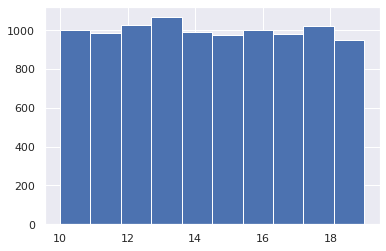

In [2]:
population = np.random.randint(10, 20, 10000) # 10~20 uniform 분포
# population = np.random.randn(10000) # # 평균 0 표준편차 1 인 정규분포 무작위 10,000개 추출
ax = plt.hist(population)

### 표본추출(sampling)
- 관측된 표본의 평균($\overline{X}$)으로 알 수없는 모집단의 평균을 estimation 하는 추론(Inference)

# <font color='blue'> $ \hat{\theta} = [\hat{\mu}, .....]$

In [3]:
np.random.seed(10)
samples = []
for i in range(200):
    sample = np.random.choice(a=population, size=100)
    samples.append(sample.mean())

- 도수분포도(Histogram)
- probability fuction(pdf), cumulative probability fuction(cdf)

(array([ 2.,  2., 11., 31., 41., 31., 43., 26.,  8.,  5.]),
 array([13.68 , 13.829, 13.978, 14.127, 14.276, 14.425, 14.574, 14.723,
        14.872, 15.021, 15.17 ]),
 <a list of 10 Patch objects>)

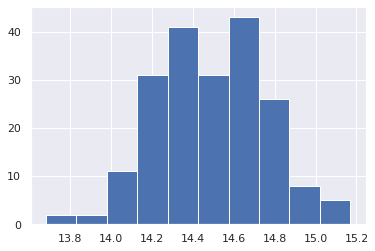

In [4]:
plt.hist(samples)

### Bootstrapping

In [5]:
np.random.seed(13)
sample = np.random.choice(a=population, size=10)

(array([ 2.,  2., 11., 31., 41., 31., 43., 26.,  8.,  5.]),
 array([13.68 , 13.829, 13.978, 14.127, 14.276, 14.425, 14.574, 14.723,
        14.872, 15.021, 15.17 ]),
 <a list of 10 Patch objects>)

14.490250000000001

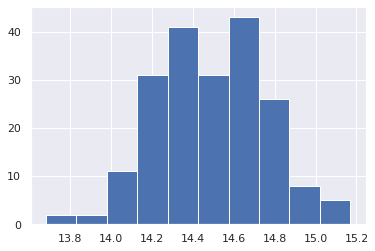

In [6]:
plt.hist(samples)
np.mean(samples)

- 모집단(10,000개)추출한 표본(10개)에서 50개 표본크기로 100번 복원추출방식하는 bootstrapping 

In [7]:
bootstrap = []
resamples = []
for i in range(100):
    resample = np.random.choice(a=population, size=50, replace=True)
    resamples.append(resample)     # 100개의 모든 재표본 데이터(50개)를 aggragation
    bootstrap.append(resample.mean())# 100개의 모든 데이터의 평균 aggregation

In [8]:
pd.DataFrame(resamples)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,15,10,12,10,12,14,12,14,11,18,...,18,10,18,14,17,19,18,10,14,15
1,18,16,19,19,13,19,19,17,14,11,...,13,13,18,11,10,19,14,15,15,16
2,10,13,17,18,16,16,19,10,10,14,...,16,16,11,16,12,13,19,13,13,15
3,17,18,11,12,16,10,11,14,12,18,...,12,11,13,17,10,11,13,15,13,19
4,14,11,11,13,15,12,13,13,14,11,...,19,16,14,18,14,17,10,10,18,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16,13,17,19,12,16,10,11,10,10,...,13,12,12,14,13,13,15,15,11,17
96,17,19,14,16,18,14,12,19,19,13,...,16,11,10,17,18,14,17,10,17,13
97,12,18,16,10,15,15,11,12,18,17,...,10,13,10,16,16,10,13,19,18,14
98,19,16,13,16,12,19,12,11,11,10,...,18,13,16,19,18,14,13,13,17,19


In [9]:
pd.DataFrame(resamples).mean(1)

0     14.64
1     15.08
2     14.16
3     14.42
4     14.68
      ...  
95    14.08
96    14.68
97    14.74
98    15.06
99    14.38
Length: 100, dtype: float64

In [10]:
bootstrap[:5]

[14.64, 15.08, 14.16, 14.42, 14.68]

### 중심극한정리(Central limit theorm)

(array([ 1.,  3.,  5.,  9., 23., 18., 20., 14.,  4.,  3.]),
 array([13.1  , 13.352, 13.604, 13.856, 14.108, 14.36 , 14.612, 14.864,
        15.116, 15.368, 15.62 ]),
 <a list of 10 Patch objects>)

부트스트래핑의 평균(중심극한정리) : 14.482000000000003


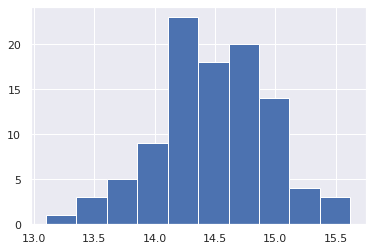

In [11]:
plt.hist(bootstrap)
print(f'부트스트래핑의 평균(중심극한정리) : {np.mean(bootstrap)}')

## 평균, 분산
- 단변량(Univariate statistics), 정규분포 가상 데이터 생성

In [12]:
sample_size =100
sample = np.random.randn(sample_size) # 평균 0 표준편차 1 인 정규분포 무작위 100개 추출
print(f'max/min {sample.max()}, {sample.min()}')
print(f'mean :  {np.mean(sample)}, mean :  {np.std(sample)}')

max/min 2.2235295363923013, -2.445901030644767
mean :  -0.08854232039434758, mean :  1.0104175812318208


## 도수분포도(Frequency distribution)
- 통계학에서 도수 분포는 표본의 다양한 산출 분포를 보여주는 목록, 표, 그래프이다. 표에 들어가는 각 항목은 특정 그룹이나 주기 안에 값이 발생한 빈도나 횟수를 포함하고 있으며 이러한 방식으로 표는 표본 값의 분포를 요약한다

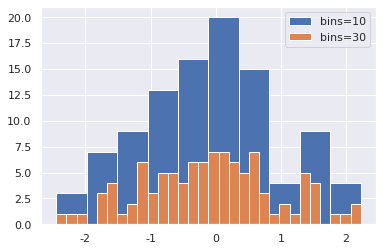

In [13]:
ax = plt.hist(sample, label='bins=10')
ax = plt.hist(sample, bins=30, label='bins=30')
plt.legend()
# ax = plt.hist(sample, density=True) # 출현개수가 아니라 빈도로 표시(즉 확률)

- 산포도(Scatter diagram)

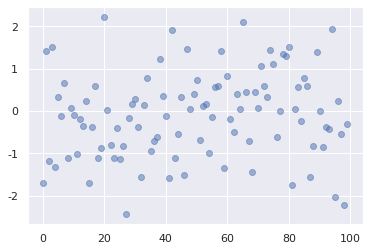

In [14]:
ax = plt.scatter(np.arange(len(sample)), sample,  alpha=0.5)

## 확률밀도함수
- Probability density fuction(probability mass function for discrete data)
### $ \sum_{i=1} ^{100}f(y) = 1$

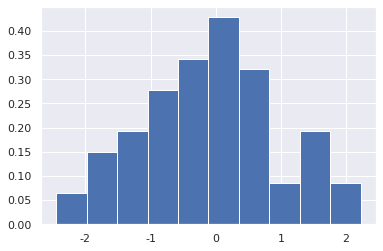

In [15]:
ax = plt.hist(sample, density=True) # 출현개수가 아니라 빈도로 표시(즉 확률) - 도수분포도와 같은 정보

In [16]:
from scipy.stats import norm
rv = norm() # Random variates Class
rv.pdf(2.96)

0.004992899213612376

### $ \int\limits_0 ^{\infty} f(y) dy = 1$

<Figure size 1224x216 with 0 Axes>

Text(0, 0.5, 'f(y)')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


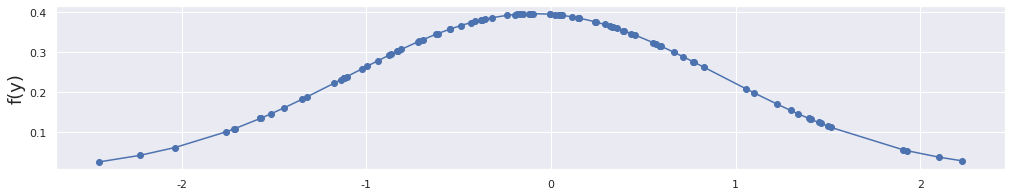

In [17]:
fit = norm.pdf(sorted(sample), np.mean(sample), np.std(sample)) # it is a fitting!
plt.figure(figsize=(17,3))
ax = plt.plot(sorted(sample), fit, '-o')
plt.ylabel('f(y)', fontsize='18')

## 우도 (Likelihood, possibility)와 확률(probability)
- 관측값이 어떤 확률분포(모집단)에서 나왔을 가능성은 ? 우도(가능성)으로 특정값에서의 확률밀도함수 값
- 특정한 확률분포(모집단)에서 관찰한 관측값이 나올 경우의 수(확률) ?

# <font color='blue'> $ Likelihood = L(\theta/{X})$    
# <font color='green'> $ Probability = P({X}/\theta)$

# Quiz
- 2차 세계대전당시 독일의 V로켓은 번호는 serial number라는 첩보를 입수하여 2명의 스파이를 보내 번호가
- spy A = (1200, 700, 600), spy B = (500, 600) 일때 v-로켓의 생산대수는 예측하라.

In [18]:
A_population = np.random.normal(-10, 10, 1000) # 평균 10 표준편차 10인 정규분포 무작위 1000개 추출
B_population = np.random.normal(10, 10, 1000) # 평균 10 표준편차 10인 정규분포 무작위 1000개 추출

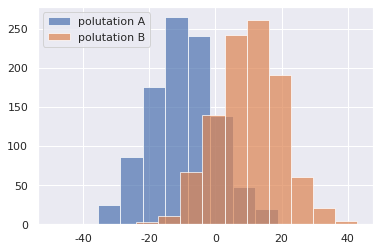

In [19]:
ax = plt.hist(A_population, alpha=0.7, label='polutation A')
ax = plt.hist(B_population, alpha=0.7, label='polutation B')
plt.legend()

## 누적확률밀도함수
- Cumulative distribution Probability fuction

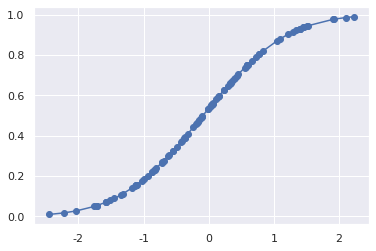

In [20]:
cum_fit = norm.cdf(sorted(sample), np.mean(sample), np.std(sample)) # it is a fitting!
ax = plt.plot(sorted(sample), cum_fit, '-o')

<Figure size 1224x360 with 0 Axes>

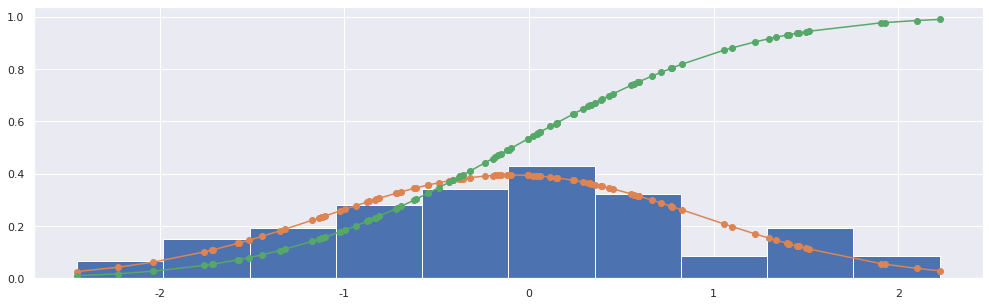

In [21]:
plt.figure(figsize=(17,5))
ax = plt.hist(sample, density=True) 
ax = plt.plot(sorted(sample), fit, '-o')
ax = plt.plot(sorted(sample), cum_fit, '-o')

## p-value
- 관측값의 p-value 가 낮으면 anomalious data, outlier로 판단 가능 

In [22]:
print(f' 관측값 2.58의 p-value :{1- rv.cdf(2.58)}')

 관측값 2.58의 p-value :0.004940015757770699


## Outliers 

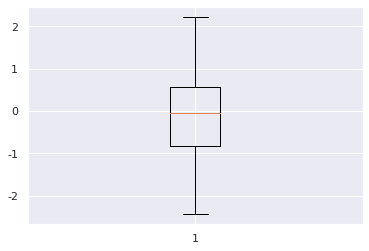

In [23]:
ax = plt.boxplot(sample)

In [24]:
q1, q3 = np.quantile(sample,0.25), np.quantile(sample,0.75)
iqr = q3 - q1
l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr
print('Lower fence: ', l_fence, 'Upper fence: ', u_fence)

Lower fence:  -2.931991961406041 Upper fence:  2.6758124263517047


In [25]:
sample[(sample > u_fence) | (sample < l_fence)]

array([], dtype=float64)

- 5개의 이상치를 임의로 생성하여 박스상자 재확인

In [26]:
for i in range(1, 5):
    sample[np.random.randint(len(sample))] =  np.random.rand()*10

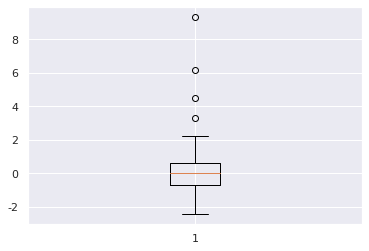

In [27]:
ax = plt.boxplot(sample)

- 연구자 주관적 판단에 따라 이상치 설정 가능

4.195690226546374e-20

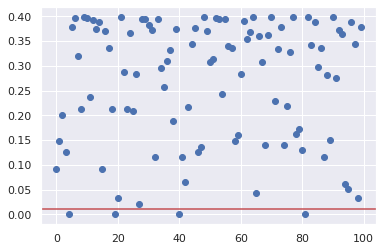

In [28]:
ax = plt.scatter(np.arange(len(sample)),rv.pdf(sample)) # Probability density function.
plt.axhline(0.01, color='r')
rv.pdf(sample).min() # pdf 최소값 (최소빈도)

## 다변량 분포(Multivariate statistics) 
 - 두 변수의 평균과 분산, 공분산으로 산포도(scatter plot)

Text(0.5, 1.0, 'The scatter graph of x1, x2')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


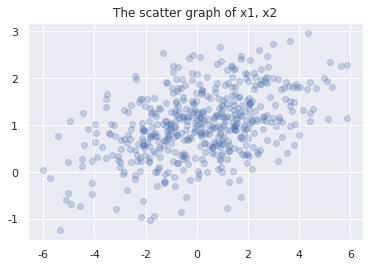

In [29]:
cov = 0.7
mean = [0, 1]
true_cov = np.array([[5, cov],
                     [cov, .5]])

X = np.random.RandomState(0).multivariate_normal(mean= mean,
                                                 cov= true_cov,
                                                 size= 500)

ax = plt.scatter(X[:,0], X[:,1], alpha=0.25)
plt.title("The scatter graph of x1, x2")

In [30]:
np.corrcoef(X, rowvar=False)

array([[1.        , 0.43896302],
       [0.43896302, 1.        ]])

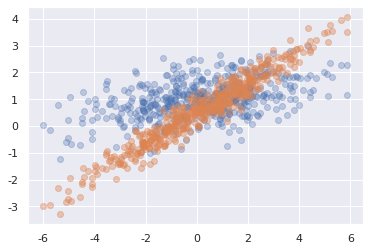

In [31]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.3)
ax = plt.scatter(X[:,0], np.dot(X, [0.5, 0.5]), alpha=0.4)

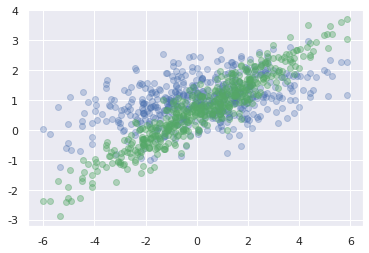

In [32]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.3)
ax = plt.scatter(X[:,0], np.dot(X, [0.4, 0.6]), color='g', alpha=0.4)

In [36]:
np.cov(X, rowvar=False)
print('\n')
np.trace(np.cov(X, rowvar=False))
print('\n')
np.cov(X, rowvar=False)/np.trace(np.cov(X, rowvar=False))

array([[4.74461226, 0.67558324],
       [0.67558324, 0.49923053]])

5.243842786030379

array([[0.90479682, 0.12883362],
       [0.12883362, 0.09520318]])

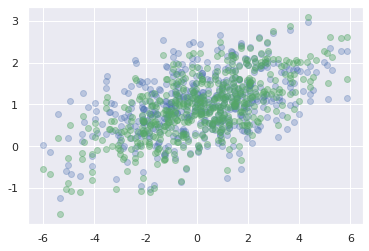

In [37]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.3)
ax = plt.scatter(X[:,0], np.dot(X, [0.09520318, 0.90479682]), color='g', alpha=0.4)

## Multivariate gaussian distribution between 2 clusters
### Simpson's paradox
* 두 독립변수의 분포는 정규분포이고 negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 
* y의 클래스에 따라 모수가 달라

첫번째와 두번째 모집단 평균은 각각 (-2, -2), (2, 2)

공분산은
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}

In [38]:
import scipy.stats
np.random.seed(13)

rv0 = scipy.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = scipy.stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv0.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()

Text(0.5, 1.0, 'The joint distribution of two variables')

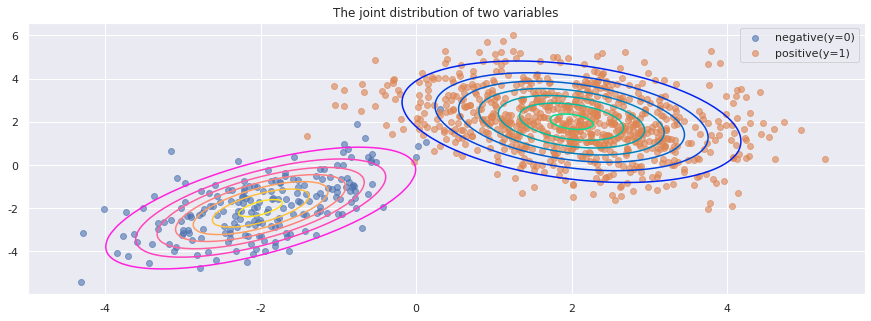

In [39]:
xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(15,5))
plt.contour(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)', alpha =0.6)
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)', alpha =0.6)
plt.legend(); plt.title('The joint distribution of two variables')

plt.show()

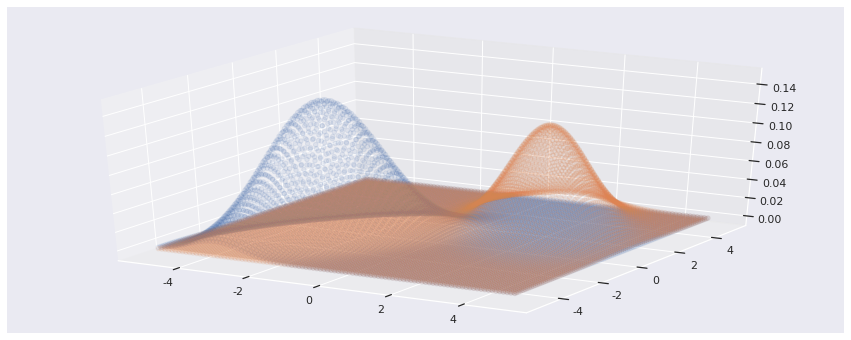

In [40]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(15,6))
ax = plt.axes(projection='3d')
ax.scatter3D(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring', alpha=0.1)
ax.scatter3D(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter', alpha=0.1)

## 확률 모형(Probabilistic models)
### 선형회귀분석(Linear regression)

In [41]:
from sklearn import linear_model, datasets
n_samples = 1000
X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=217,
)

# <font color='blue'> $ P({y})$
### $ E({y}) = \sum_{i=1} ^{1000}yP(y),   \sum_{i=1} ^{1000}P(y) = 1$
### $ E({y}) = \int\limits_0 ^{\infty} yP(y) dy,   \int\limits_0 ^{\infty} P(y) dy = 1$

<Figure size 1080x288 with 0 Axes>

Text(0.5, 1.0, 'P(y)')

Text(0, 0.5, 'y')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


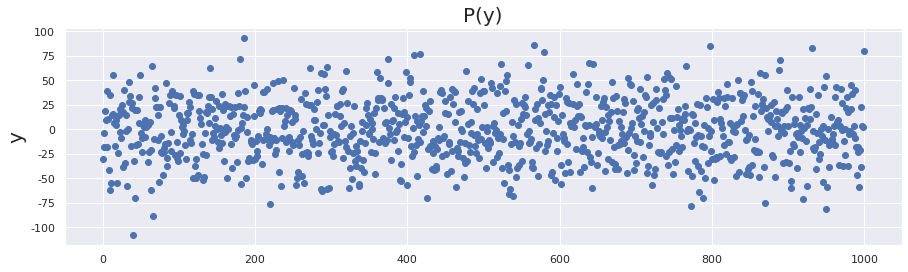

In [42]:
plt.figure(figsize=(15,4))
plt.scatter(np.arange(n_samples), y)
plt.title('P(y)', fontsize='20')
plt.ylabel('y', fontsize='20')


# <font color='blue'> $ P({y}/{x})$

<Figure size 1080x432 with 0 Axes>

LinearRegression()

Text(0.5, 1.0, 'P(y/x)')

Text(0, 0.5, 'y')

Text(0.5, 0, 'x')

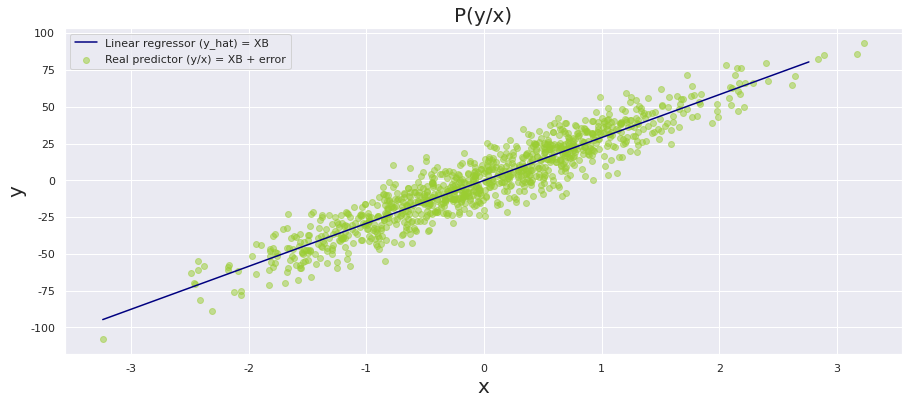

In [43]:
plt.figure(figsize=(15,6))

lr = linear_model.LinearRegression()
lr.fit(X, y)
line_X = np.arange(X.min(), X.max())[:, np.newaxis]; line_y = lr.predict(line_X)
ax = plt.plot(line_X, line_y, color="navy", label="Linear regressor (y_hat) = XB")

ax = plt.scatter(X, y, color="yellowgreen", alpha=0.5, label="Real predictor (y/x) = XB + error")
plt.title('P(y/x)', fontsize='20')
plt.legend()
plt.ylabel('y', fontsize='20'); plt.xlabel('x', fontsize='20')

## 1. P(y/x) 예측하는 방법 - MLE(Maximum likelihood estimation)
### 조건부 확률변수 y(error term)의 가우시안 분포에 대한 가정을 바탕으로 통계적해결(Parametric approach)
- The vector y has conditional linearity of  E(y/x) = XB

<img src ='https://wikimedia.org/api/rest_v1/media/math/render/svg/b7ade53ead459e6683f434982ee6811e028eda7f'>

- https://en.wikipedia.org/wiki/Maximum_likelihood_estimation

- 우도함수는 확률밀도함수와 동일
<img src='https://slideplayer.com/slide/6033440/20/images/3/Maximum+Likelihood+Estimation.jpg'>

<img src='https://t1.daumcdn.net/cfile/tistory/99B041365B27580712'>

## 2. P(y/x) 예측하는 방법 - Minimize MSE(Mean Squared Error)
### 분포에 대한 가정이 없이 Optimization(Non-parametric)
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e'>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643'>
- https://en.wikipedia.org/wiki/Linear_regression

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/e286875158615d5647351c312f4609a125a5d943'>

- ...
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/502f3fc4f99423075d9b5bfb26c0e6f3f3d03b33'>

- ......
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/f8d75d0438578dc124c1bd27e807bd4816024c0f'>

- ..........
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/fb161a08d2371663a73aae304a7ba910b7e9776a'>

## 잠재변수 모형(Latent variable models)
### Mixture Model

# <font color='blue'> $ P({y})$
## $ p({y}) = \sum_z p(y/z)p(z)$
## $ p({y}) = \int\limits p(y/z)p(z) dz $
### z is mixture elements (clusters, groups)
<img src='http://sanghyukchun.github.io/images/post/69-4.gif' width=800 height=600>

## Kullback–Leibler divergence between two mass functions
- 두 개의 확률분포의 차이점(거리?)
<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/4958785faae58310ca5ab69de1310e3aafd12b32'>
<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/756dd25036c5da76a59e58a001f3196e059f537d'>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/KL-Gauss-Example.png/480px-KL-Gauss-Example.png' width=800 height=400>

# <font color='blue'> $ P({y/x})$
## $ p({y/x}) = \sum_z p(y/x, z)p(z)$
## $ p({y/x}) = \int\limits p(y/x, z)p(z) dz $


### Basic example
- Let P and Q be the distribution as follows:
- P has a binomial distribution with ${\displaystyle N=2}$ N=2 and ${\displaystyle p=0.4}$
- Q has a discrete uniform distribution with the three possible outcomes ${\displaystyle x=}{\displaystyle x=}$ 0, 1, 2 (i.e. ${\displaystyle {\mathcal {X}}=\{0,1,2\}}$), each with probability $ {\displaystyle p=1/3}$.

In [44]:
import math

# define distributions
p = [9/25, 12/25, 4/25] # binomial distribution with {\displaystyle N=2}N=2 and {\displaystyle p=0.4}{\displaystyle p=0.4}
q = [1/3, 1/3, 1/3]
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
X_axis = np.array([1.,2.,3.])
X = ['Guess1', 'Guess2', 'Guess3']

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x7f1d743c0090>,
 [Text(0, 0, 'Guess1'), Text(0, 0, 'Guess2'), Text(0, 0, 'Guess3')])

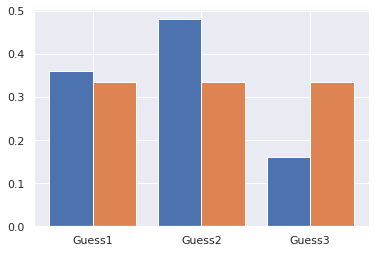

In [45]:
plt.bar(X_axis - 0.2, p, 0.4, label = 'Girls')
plt.bar(X_axis + 0.2, q, 0.4, label = 'Boys')
plt.xticks(X_axis, X)

In [46]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * math.log(p[i]/q[i]) for i in range(len(p)))

kl_pq = kl_divergence(p, q)
print(f'KL(P || Q): {kl_pq: .3f}')
kl_qp = kl_divergence(q, p)
print(f'KL(Q || P): {kl_qp: .3f}')

KL(P || Q):  0.085
KL(Q || P):  0.097


In [47]:
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * math.log2(p[i]/q[i]) for i in range(len(p)))

kl_pq = kl_divergence(p, q)
print(f'KL(P || Q): {kl_pq: .3f} bits')
kl_qp = kl_divergence(q, p)
print(f'KL(Q || P): {kl_qp: .3f} bits')

KL(P || Q):  0.123 bits
KL(Q || P):  0.141 bits


## 행렬변환(Matrix Transformation)
- 행렬은 벡터를 bully

In [48]:
cov = 0.
mean = [0, 0]
true_cov = np.array([[1, cov],
                     [cov, 1]])

X = np.random.RandomState(0).multivariate_normal(mean= mean,
                                                 cov= true_cov,
                                                 size= 1000)

Text(0.5, 1.0, 'The scatter graph of x1, x2')

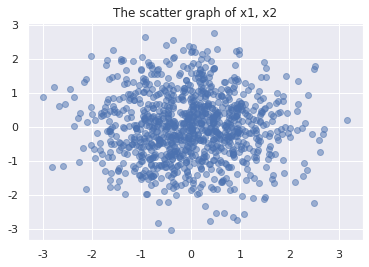

In [49]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.title("The scatter graph of x1, x2")

In [50]:
matrix_bully_1 = np.array([[5,2], [2,4]])
matrix_bully_2 = np.array([[3,-2], [5,-4]])
np.dot(X, matrix_bully_1)

array([[ 9.62057615,  5.12873353],
       [ 9.37547632, 10.92104877],
       [ 7.38323419, -0.17399554],
       ...,
       [ 1.18464244,  0.78665955],
       [ 7.32448477,  3.43678222],
       [-8.33144784, -7.52768432]])

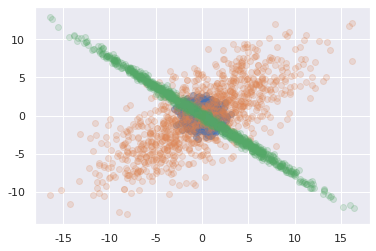

In [51]:
ax = plt.scatter(X[:,0], X[:,1], alpha=0.5)
ax = plt.scatter(np.dot(X, matrix_bully_1)[:,0], np.dot(X, matrix_bully_1)[:,1], alpha=0.2)
ax = plt.scatter(np.dot(X, matrix_bully_2)[:,0], np.dot(X, matrix_bully_2)[:,1], alpha=0.2)

## Mean centering_data preprocessing

In [52]:
city = ['Bangaluru']*3 + ['Seoul']*3 + ['Vancouber']*3
year = [2010, 2011, 2012]*3
rent =[3200, 3500, 3800, 5200, 5500, 5800, 7200, 7500, 7800]
df = pd.DataFrame(zip(city, year, rent), columns = ['city', 'year', 'rent'])
map_mean = df.groupby(['city'])['rent'].mean().to_dict()
df['rent_mean_city'] = df['city'].map(map_mean)
df

,city,year,rent,rent_mean_city
0,Bangaluru,2010,3200,3500.0
1,Bangaluru,2011,3500,3500.0
2,Bangaluru,2012,3800,3500.0
3,Seoul,2010,5200,5500.0
4,Seoul,2011,5500,5500.0
5,Seoul,2012,5800,5500.0
6,Vancouber,2010,7200,7500.0
7,Vancouber,2011,7500,7500.0
8,Vancouber,2012,7800,7500.0


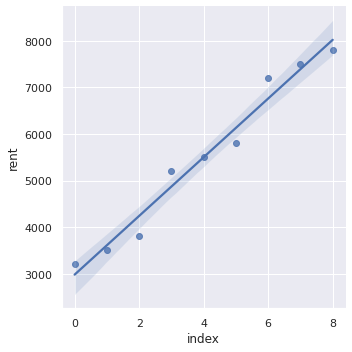

In [53]:
sns.lmplot(x='index', y='rent', data=df.reset_index())

In [54]:
df['overall_mean'] = df['rent'].mean()
df['overall_deviation'] =  df['rent'] - df['overall_mean']
df['between_deviation'] = df['rent_mean_city'] - df['overall_mean']
df['within_deviation'] = df['rent'] - df['rent_mean_city']
df.round(2)

,city,year,rent,rent_mean_city,overall_mean,overall_deviation,between_deviation,within_deviation
0,Bangaluru,2010,3200,3500.0,5500.0,-2300.0,-2000.0,-300.0
1,Bangaluru,2011,3500,3500.0,5500.0,-2000.0,-2000.0,0.0
2,Bangaluru,2012,3800,3500.0,5500.0,-1700.0,-2000.0,300.0
3,Seoul,2010,5200,5500.0,5500.0,-300.0,0.0,-300.0
4,Seoul,2011,5500,5500.0,5500.0,0.0,0.0,0.0
5,Seoul,2012,5800,5500.0,5500.0,300.0,0.0,300.0
6,Vancouber,2010,7200,7500.0,5500.0,1700.0,2000.0,-300.0
7,Vancouber,2011,7500,7500.0,5500.0,2000.0,2000.0,0.0
8,Vancouber,2012,7800,7500.0,5500.0,2300.0,2000.0,300.0


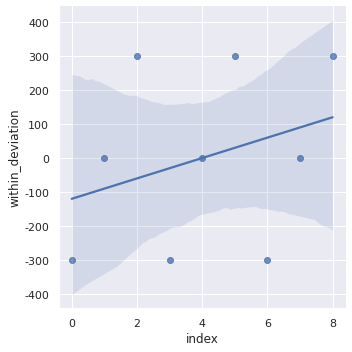

In [55]:
sns.lmplot(x='index', y='within_deviation', data=df.reset_index())

## Monte Carlo Simulation with examples

A Monte Carlo method is a technique that uses random numbers and probability to solve complex problems. The Monte Carlo simulation, or probability simulation, is a technique used to understand the impact of risk and uncertainty in financial sectors, project management, costs, and other forecasting machine learning models.

In [56]:
n =100000
count = 0
circle_x = []
circle_y = []
rec_x = []; rec_y = []

for i in range(n):
    x = np.random.random()
    y = np.random.random()
    if ((np.square(x) + np.square(y)) < 1) :
        count= count+1
        circle_x.append(x); circle_y.append(y)
    else:
        rec_x.append(x); rec_y.append(y)

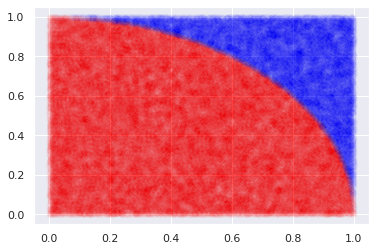

In [57]:
plt.scatter(circle_x, circle_y, color='red', alpha=0.01)
plt.scatter(rec_x, rec_y, color='blue', alpha=0.01)

In [58]:
from math import pi
print(f'수학적 계산에 의한 원의 면적은 {pi*1*1/4}') # 전체 원(반지름은 1)면적의 1/4
print(f'몬테커를로 시뮬레이션 계산에 의한 원의 면적은 {len(circle_x)/n}')

수학적 계산에 의한 원의 면적은 0.7853981633974483
몬테커를로 시뮬레이션 계산에 의한 원의 면적은 0.78401


# Working With Text Data

In [ ]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

# Loading the 20 newsgroups dataset

In [ ]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [ ]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)
type(twenty_train)

sklearn.utils.Bunch

In [ ]:
twenty_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
twenty_train.target_names
len(twenty_train.data)
len(twenty_train.filenames)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

2257

2257

In [ ]:
df = pd.DataFrame(twenty_train.data, columns = ['twenty_train.filenames'])
df['target'] = twenty_train.target
df.head()

,twenty_train.filenames,target
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,3
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3


In [ ]:
twenty_train.target_names
np.unique(twenty_train.target)

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

array([0, 1, 2, 3], dtype=int64)

In [ ]:
match_dict = dict(zip(np.unique(twenty_train.target), twenty_train.target_names))
match_dict

{0: 'alt.atheism',
 1: 'comp.graphics',
 2: 'sci.med',
 3: 'soc.religion.christian'}

In [ ]:
df['target'].map(match_dict)

0                comp.graphics
1                comp.graphics
2       soc.religion.christian
3       soc.religion.christian
4       soc.religion.christian
                 ...          
2252                   sci.med
2253                   sci.med
2254                   sci.med
2255                   sci.med
2256                   sci.med
Name: target, Length: 2257, dtype: object

In [ ]:
df['target'] = df['target'].map(match_dict)
df.head()

,twenty_train.filenames,target
0,From: sd345@city.ac.uk (Michael Collier)\nSubj...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson)\nSu...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart)\nSubjec...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian


In [ ]:
twenty_train.data[0]
twenty_train.data[0].split('\n') # text to list
twenty_train.data[0].split('\n')[:3]
'\n'.join(twenty_train.data[0].split('\n')[:3]) # list to text
',    '.join(twenty_train.data[0].split('\n')[:3])

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

['From: sd345@city.ac.uk (Michael Collier)',
 'Subject: Converting images to HP LaserJet III?',
 'Nntp-Posting-Host: hampton',
 'Organization: The City University',
 'Lines: 14',
 '',
 'Does anyone know of a good way (standard PC application/PD utility) to',
 'convert tif/img/tga files into LaserJet III format.  We would also like to',
 'do the same, converting to HPGL (HP plotter) files.',
 '',
 'Please email any response.',
 '',
 'Is this the correct group?',
 '',
 'Thanks in advance.  Michael.',
 '-- ',
 'Michael Collier (Programmer)                 The Computer Unit,',
 'Email: M.P.Collier@uk.ac.city                The City University,',
 'Tel: 071 477-8000 x3769                      London,',
 'Fax: 071 477-8565                            EC1V 0HB.',
 '']

['From: sd345@city.ac.uk (Michael Collier)',
 'Subject: Converting images to HP LaserJet III?',
 'Nntp-Posting-Host: hampton']

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton'

'From: sd345@city.ac.uk (Michael Collier),    Subject: Converting images to HP LaserJet III?,    Nntp-Posting-Host: hampton'

In [ ]:
print("\n".join(twenty_train.data[0].split("\n")[:3]))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton


In [ ]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [ ]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [ ]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


# Extracting features from text files
## Bags of words
## Tokenizing text with scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts
X_train_counts.shape

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

(2257, 35788)

In [ ]:
X_train_counts.toarray()
pd.DataFrame(X_train_counts.toarray())

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

,0,1,2,3,4,5,6,7,8,9,...,35778,35779,35780,35781,35782,35783,35784,35785,35786,35787
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [ ]:
count_vect.vocabulary_.get('algorithm')

4690

- From occurrences to frequencies

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(2257, 35788)

In [ ]:
X_train_tf.toarray()
pd.DataFrame(X_train_tf.toarray())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

,0,1,2,3,4,5,6,7,8,9,...,35778,35779,35780,35781,35782,35783,35784,35785,35786,35787
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.15523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048622,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.069338,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

In [ ]:
X_train_tf.toarray()
pd.DataFrame(X_train_tf.toarray())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

,0,1,2,3,4,5,6,7,8,9,...,35778,35779,35780,35781,35782,35783,35784,35785,35786,35787
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.15523,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048622,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.069338,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2255,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Training a classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [ ]:
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


- Building a pipeline

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

In [ ]:
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

- Evaluation of the performance on the test set

In [ ]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [ ]:
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=42,
                          max_iter=5, tol=None)),
])

text_clf.fit(twenty_train.data, twenty_train.target)

predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

0.9101198402130493

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
    target_names=twenty_test.target_names))

metrics.confusion_matrix(twenty_test.target, predicted)

                        precision    recall  f1-score   support

           alt.atheism       0.95      0.80      0.87       319
         comp.graphics       0.87      0.98      0.92       389
               sci.med       0.94      0.89      0.91       396
soc.religion.christian       0.90      0.95      0.93       398

              accuracy                           0.91      1502
             macro avg       0.91      0.91      0.91      1502
          weighted avg       0.91      0.91      0.91      1502



array([[256,  11,  16,  36],
       [  4, 380,   3,   2],
       [  5,  35, 353,   3],
       [  5,  11,   4, 378]], dtype=int64)

- Parameter tuning using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

In [ ]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1)

In [ ]:
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [ ]:
twenty_train.target_names[gs_clf.predict(['God is love'])[0]]

'soc.religion.christian'

In [ ]:
gs_clf.best_score_

for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

0.9175000000000001

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


# End